# Customer Segmentation

We will use a real dataset provided by a CRM System owned from a Higher Technical Institute in Ecuador. This dataset refers those students/customers who have been enrolled in a Electricity Automotive course. So, the students come from different parts of the city (Quito) and they have different levels of economy, studies, age and more. The Customer Segmentation will help us to classify the students in base of their characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV files into pandas DataFrames
df = pd.read_csv('EAutomotive_Students_2020-2023.csv')
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [3]:
df.shape

(271, 16)

In [4]:
df['matr_fecha_matricula'] = pd.to_datetime(df['matr_fecha_matricula'])
df=df[(df['matr_fecha_matricula']>'2021-01-01 00:00:00') & (df['matr_fecha_matricula']<'2023-08-01 00:00:00')]

In [5]:
df.columns

Index(['pers_nombres', 'pers_apellidos', 'estu_nivel_estudio',
       'estu_cargo_ocupa', 'estu_direccion_trabajo', 'estu_ingresos_mensuales',
       'pers_fecha_nacimiento', 'matr_medio_informacion', 'pers_domicilio',
       'pers_provincia', 'pers_ciudad', 'pers_sector', 'pers_nacionalidad',
       'matr_fecha_matricula', 'matr_estado', 'curs_nombre'],
      dtype='object')

In [6]:
new_names=['nombres', 'apellidos','estudios', 'ocupación', 'dirtrabajo','ingresos','fecha_nacimiento', 
        'medio', 'domicilio','provincia','ciudad', 'sector', 'nacionalidad', 'fecha_matricula', 'estado', 'nombre_curso']

# 1. Preprocessing

In [7]:
i=0
for i in range(0,df.columns.shape[0]):
    df.rename(columns={df.columns[i]:new_names[i]},inplace=True)

In [8]:
df.shape

(75, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 177 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nombres           75 non-null     object        
 1   apellidos         75 non-null     object        
 2   estudios          75 non-null     object        
 3   ocupación         75 non-null     object        
 4   dirtrabajo        74 non-null     object        
 5   ingresos          49 non-null     object        
 6   fecha_nacimiento  75 non-null     object        
 7   medio             75 non-null     object        
 8   domicilio         75 non-null     object        
 9   provincia         75 non-null     int64         
 10  ciudad            75 non-null     int64         
 11  sector            75 non-null     object        
 12  nacionalidad      0 non-null      float64       
 13  fecha_matricula   75 non-null     datetime64[ns]
 14  estado            75 non-

In [10]:
df.describe(include='all').T

C:\Users\USER\AppData\Local\Temp/ipykernel_1536/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
nombres,75,75,Carlos Hugo,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apellidos,75,75,Chiluisa Achi,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estudios,75,5,NIVEL03,44,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ocupación,75,4,CARG01,38,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dirtrabajo,74,56,no tiene,8,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingresos,49,3,INGR01,29,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_nacimiento,75,75,1972-01-09,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medio,75,5,MED02,44,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domicilio,75,59,Carapungo,4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provincia,75.0,NaN,NaN,NaN,NaT,NaT,33.24,2.95388,20.0,34.0,34.0,34.0,34.0


In [11]:
df.isna().sum()

nombres              0
apellidos            0
estudios             0
ocupación            0
dirtrabajo           1
ingresos            26
fecha_nacimiento     0
medio                0
domicilio            0
provincia            0
ciudad               0
sector               0
nacionalidad        75
fecha_matricula      0
estado               0
nombre_curso         0
dtype: int64

**Studies**

In [12]:
const_uni=100/7

In [13]:
def_studies=['NIVEL01','NIVEL02','NIVEL03','NIVEL04','NIVEL05','NIVEL06','NIVEL07','NIVEL08']
#new_nstudies=['SinEstudios', 'Primaria', 'Secundaria', 'Universidad', 'Maestria', 
#            'Doctorado', 'Tecnico', 'Tecnologia']
new_nstudies=[4, const_uni*1, const_uni*2, const_uni*5, const_uni*6, 
              const_uni*7, const_uni*3, const_uni*4]

df['estudios'].replace(def_studies,new_nstudies,inplace=True)
df['estudios'].value_counts(dropna=False)

28.571429    44
71.428571    19
14.285714     4
85.714286     4
42.857143     4
Name: estudios, dtype: int64

##### df['estudios'].fillna(df['estudios'].mode()[0], inplace=True) #replacing NaN with mode

**Citizenship**

In [14]:
df['nacionalidad']='Ecuatoriano'

**Medium of information**

In [15]:
name_med=['CursoEmpresarial', 'Facebook', 'PaginaWeb', 'Radio', 'Recomendacion','Whatsapp','Instagram']
med_cod=['MED01','MED02','MED03','MED04','MED05','MED06','MED07']
df['medio'].replace(med_cod,name_med,inplace=True)
df['medio'].value_counts(dropna=False)

Facebook            44
Recomendacion       21
PaginaWeb            8
CursoEmpresarial     1
Whatsapp             1
Name: medio, dtype: int64

In [16]:
df['medio'].isna().sum()

0

In [17]:
df['medio'].fillna(df['medio'].mode()[0], inplace=True) #replacing NaN with mode

In [18]:
df['medio'].value_counts(dropna=False)

Facebook            44
Recomendacion       21
PaginaWeb            8
CursoEmpresarial     1
Whatsapp             1
Name: medio, dtype: int64

**Occupation Level**

In [19]:
cod_job=[10,20,30,1]
job_cod=['CARG01','CARG02','CARG03','CARG04']

df['ocupación'].replace(job_cod,cod_job,inplace=True)
df['ocupación'].value_counts(dropna=False)

10    38
1     22
30     9
20     6
Name: ocupación, dtype: int64

In [20]:
df['ocupación'].fillna(df['ocupación'].mode()[0], inplace=True) #replacing NaN with mode

**Monthly Incomes**

In [21]:
range_wages=['Entre100y420', 'Entre421y800', 'Entre801y1500', 'Mayor a 1500']
wages_cod=['INGR01','INGR02','INGR03','INGR04']
wages_av=[np.mean([100,420]),np.mean([421,800]),np.mean([801,1500]),2000]
df['ingresos'].replace(wages_cod,range_wages,inplace=True)
df['ingresos'].value_counts(dropna=False)

Entre100y420     29
NaN              26
Entre421y800     17
Entre801y1500     3
Name: ingresos, dtype: int64

In [22]:
df['ingresos'].fillna(df['ingresos'].mode()[0], inplace=True) #replacing NaN with mode

In [23]:
df['ingresos'].replace({'Entre100y420':np.mean([100,420]),
                        'Entre421y800':np.mean([421,800]), 
                        'Entre801y1500':np.mean([801,1500]), 
                        'Mayor a 1500':2000},inplace=True)

**Followed Last Course**

In [24]:
df.columns

Index(['nombres', 'apellidos', 'estudios', 'ocupación', 'dirtrabajo',
       'ingresos', 'fecha_nacimiento', 'medio', 'domicilio', 'provincia',
       'ciudad', 'sector', 'nacionalidad', 'fecha_matricula', 'estado',
       'nombre_curso'],
      dtype='object')

In [25]:
#df.ultimocurso.value_counts(dropna=False)

**Sector**

In [26]:
#range_wages=['NORTE', 'CENTRO-NORTE', 'CENTRO-SUR', 'CENTRO','SUR','PERIFERIA']
distants=[40, 30, 25, 25, 10, 50]
wages_cod=['UDOM01','UDOM02','UDOM03','UDOM04','UDOM05','UDOM06']
df['sector'].replace(wages_cod,distants,inplace=True)
df['sector'].value_counts(dropna=False)

10    54
25     9
50     6
40     5
30     1
Name: sector, dtype: int64

**Enrolled State**

In [27]:
range_wages=['Inscrito', 'Matriculado', 'Desertado', 'Culminado']
wages_cod=['INSMAT01','INSMAT02','INSMAT03','INSMAT05']
df['estado'].replace(wages_cod,range_wages,inplace=True)
df['estado'].value_counts(dropna=False)

Culminado      52
Desertado      15
Matriculado     8
Name: estado, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 177 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nombres           75 non-null     object        
 1   apellidos         75 non-null     object        
 2   estudios          75 non-null     float64       
 3   ocupación         75 non-null     int64         
 4   dirtrabajo        74 non-null     object        
 5   ingresos          75 non-null     float64       
 6   fecha_nacimiento  75 non-null     object        
 7   medio             75 non-null     object        
 8   domicilio         75 non-null     object        
 9   provincia         75 non-null     int64         
 10  ciudad            75 non-null     int64         
 11  sector            75 non-null     int64         
 12  nacionalidad      75 non-null     object        
 13  fecha_matricula   75 non-null     datetime64[ns]
 14  estado            75 non-

In [29]:
df.head()

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso
177,Carlos Hugo,Chiluisa Achi,28.571429,10,Av.Mariscal Sucre y taisha,260.0,1972-01-09,Facebook,Santa bárbara,34,229,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz
178,Henry Paul,Molina Alvarez,71.428571,10,Latacunga,260.0,1992-09-08,Facebook,Latacunga,34,229,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz
179,Edwin Hernan,Garzon Paredes,28.571429,10,El valle sangolqqui \n,260.0,1971-08-19,Facebook,La Santiago,34,229,10,Ecuatoriano,2021-02-26,Culminado,Electricidad Automotriz
180,Franklin,Gualoto,28.571429,10,NaN,260.0,2002-11-29,Facebook,no tiene,34,229,10,Ecuatoriano,2021-02-26,Culminado,Electricidad Automotriz
181,Jorge Humberto,Suarez Mantilla,28.571429,10,Interoceánica y Simón Bolívar,260.0,1967-04-13,Recomendacion,"José de Inés, obrero independiente",34,229,10,Ecuatoriano,2021-06-03,Culminado,Electricidad Automotriz


**Province**

In [30]:
df['provincia'].value_counts()

34    70
26     2
20     2
21     1
Name: provincia, dtype: int64

In [31]:
def_prov=df['provincia'].value_counts().index.tolist()
new_prov=['Pichincha', 'Imbabura','Chimborazo','Cotopaxi']
df['provincia'].replace(def_prov,new_prov,inplace=True)
df['provincia'].value_counts(dropna=False)

Pichincha     70
Imbabura       2
Chimborazo     2
Cotopaxi       1
Name: provincia, dtype: int64

**City**

In [32]:
df['ciudad'].value_counts()

229    68
77      2
223     1
142     1
228     1
141     1
87      1
Name: ciudad, dtype: int64

In [33]:
def_ciud=df['ciudad'].value_counts().index.tolist()
new_ciud=['QUITO','RIOBAMBA','RUMINAHUI','ANTONIO ANTE','MEJIA','IBARRA','LATACUNGA']

df['ciudad'].replace(def_ciud,new_ciud,inplace=True)
df['ciudad'].value_counts(dropna=False)

QUITO           68
RIOBAMBA         2
RUMINAHUI        1
ANTONIO ANTE     1
MEJIA            1
IBARRA           1
LATACUNGA        1
Name: ciudad, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 177 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nombres           75 non-null     object        
 1   apellidos         75 non-null     object        
 2   estudios          75 non-null     float64       
 3   ocupación         75 non-null     int64         
 4   dirtrabajo        74 non-null     object        
 5   ingresos          75 non-null     float64       
 6   fecha_nacimiento  75 non-null     object        
 7   medio             75 non-null     object        
 8   domicilio         75 non-null     object        
 9   provincia         75 non-null     object        
 10  ciudad            75 non-null     object        
 11  sector            75 non-null     int64         
 12  nacionalidad      75 non-null     object        
 13  fecha_matricula   75 non-null     datetime64[ns]
 14  estado            75 non-

**Birthday**

In [35]:
df['fecha_nacimiento'].isna().sum()

0

In [36]:
modebirth=df['fecha_nacimiento'].value_counts().index.tolist()[1] #In value counts this is the second mode most registered

In [37]:
df['fecha_nacimiento'].fillna(modebirth, inplace=True) #replacing NaN with mode
df['fecha_nacimiento'].replace('0002-11-29 BC',modebirth,inplace=True)

In [38]:
df['fecha_nacimiento'].value_counts()

1972-01-09    1
1985-08-20    1
1997-04-23    1
1980-02-03    1
2005-08-01    1
             ..
1977-03-12    1
2004-03-24    1
1969-06-29    1
1999-11-23    1
1994-03-05    1
Name: fecha_nacimiento, Length: 75, dtype: int64

**Address**

In [39]:
modedir=df['domicilio'].mode()[0]
df['domicilio'].fillna(modedir, inplace=True) #replacing NaN with mode

In [40]:
df['domicilio'].value_counts(dropna=False)

Carapungo                                            4
Chillogallo                                          4
Calderon                                             3
Guamani                                              3
El Beaterio                                          2
Riobamba                                             2
Santa Barbara                                        2
Quitumbe                                             2
Latacunga                                            2
Santa Rita                                           2
Av. Gral Rumiñahui y Av. Atahualpa # 19 Sangolqui    1
Lucha de los pobres S26-80                           1
Ferroviaria                                          1
Cdla Ibarra                                          1
Santa Rosa 3era etapa de Chillogallo                 1
Atuntaqui                                            1
Conocoto                                             1
La Ferroviaria                                       1
Santa bárb

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 177 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nombres           75 non-null     object        
 1   apellidos         75 non-null     object        
 2   estudios          75 non-null     float64       
 3   ocupación         75 non-null     int64         
 4   dirtrabajo        74 non-null     object        
 5   ingresos          75 non-null     float64       
 6   fecha_nacimiento  75 non-null     object        
 7   medio             75 non-null     object        
 8   domicilio         75 non-null     object        
 9   provincia         75 non-null     object        
 10  ciudad            75 non-null     object        
 11  sector            75 non-null     int64         
 12  nacionalidad      75 non-null     object        
 13  fecha_matricula   75 non-null     datetime64[ns]
 14  estado            75 non-

In [42]:
df.head(2)

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso
177,Carlos Hugo,Chiluisa Achi,28.571429,10,Av.Mariscal Sucre y taisha,260.0,1972-01-09,Facebook,Santa bárbara,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz
178,Henry Paul,Molina Alvarez,71.428571,10,Latacunga,260.0,1992-09-08,Facebook,Latacunga,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz


**Age**

In [43]:
#import pandas as pd
from datetime import date

# convert the column of dates to datetime objects
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])

# calculate the age based on the current date
today = date.today()
today
df['edad'] = (today.year - df['fecha_nacimiento'].dt.year)#-((today.month, today.day) < (df['fecha_nacimiento'].dt.month,df['fecha_nacimiento'].dt.day))

# print the DataFrame with the calculated ages
df.head(3)

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso,edad
177,Carlos Hugo,Chiluisa Achi,28.571429,10,Av.Mariscal Sucre y taisha,260.0,1972-01-09,Facebook,Santa bárbara,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz,52
178,Henry Paul,Molina Alvarez,71.428571,10,Latacunga,260.0,1992-09-08,Facebook,Latacunga,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz,32
179,Edwin Hernan,Garzon Paredes,28.571429,10,El valle sangolqqui \n,260.0,1971-08-19,Facebook,La Santiago,Pichincha,QUITO,10,Ecuatoriano,2021-02-26,Culminado,Electricidad Automotriz,53


# 2. EDA: Exploratory Data Analysis

In [44]:
df['edad'].describe()

count    75.000000
mean     32.920000
std      12.417033
min       2.000000
25%      24.000000
50%      32.000000
75%      41.000000
max      57.000000
Name: edad, dtype: float64

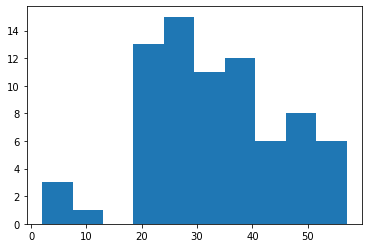

In [45]:
plt.hist(df['edad']);

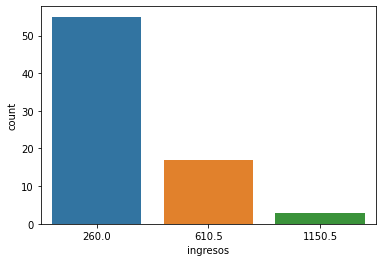

In [46]:
sns.countplot(x=df['ingresos']);

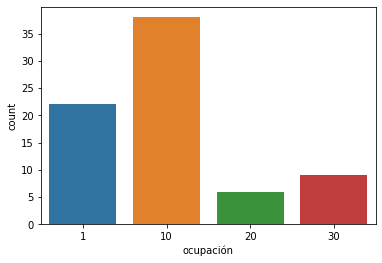

In [47]:
sns.countplot(x=df['ocupación']);

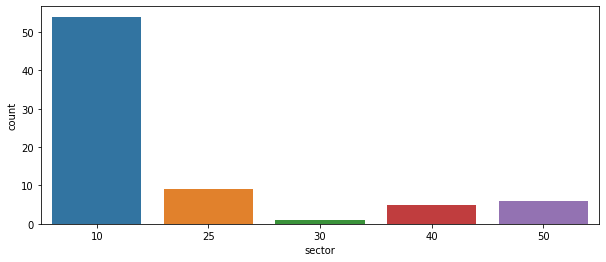

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['sector']);

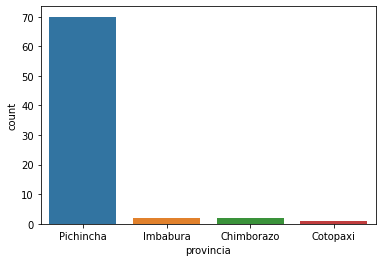

In [49]:
sns.countplot(x=df['provincia']);

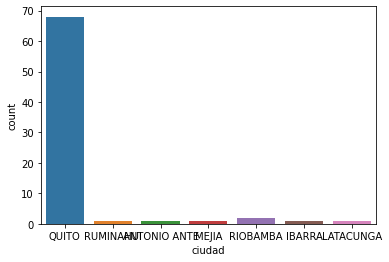

In [50]:
sns.countplot(x=df['ciudad']);

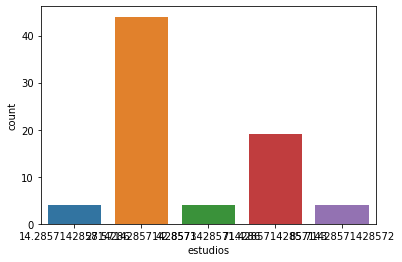

In [51]:
sns.countplot(x=df['estudios']);

In [52]:
df[df['ciudad']=='ANTONIO ANTE']

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso,edad
220,Carlos Andres,Espinosa Jacome,71.428571,1,No trabajo,260.0,2000-01-27,Facebook,Atuntaqui,Imbabura,ANTONIO ANTE,25,Ecuatoriano,2023-01-29,Culminado,Electricidad Automotriz,24


In [53]:
df[df['ciudad']=='RUMIÑAHUI']

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso,edad


In [54]:
df.shape

(75, 17)

In [55]:
df.drop([220],inplace=True)

In [56]:
df.shape

(74, 17)

### Deleting labels to get the final labels for  modeling

In [57]:
df2=df.copy()

In [58]:
df2.head(3)

,nombres,apellidos,estudios,ocupación,dirtrabajo,ingresos,fecha_nacimiento,medio,domicilio,provincia,ciudad,sector,nacionalidad,fecha_matricula,estado,nombre_curso,edad
177,Carlos Hugo,Chiluisa Achi,28.571429,10,Av.Mariscal Sucre y taisha,260.0,1972-01-09,Facebook,Santa bárbara,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz,52
178,Henry Paul,Molina Alvarez,71.428571,10,Latacunga,260.0,1992-09-08,Facebook,Latacunga,Pichincha,QUITO,10,Ecuatoriano,2021-02-09,Culminado,Electricidad Automotriz,32
179,Edwin Hernan,Garzon Paredes,28.571429,10,El valle sangolqqui \n,260.0,1971-08-19,Facebook,La Santiago,Pichincha,QUITO,10,Ecuatoriano,2021-02-26,Culminado,Electricidad Automotriz,53


In [59]:
df2.shape

(74, 17)

In [60]:
df2.drop(labels=['nombres','apellidos','fecha_nacimiento','domicilio','nacionalidad',
                'fecha_matricula','estado','dirtrabajo',
                'provincia','ciudad','nombre_curso','medio'],axis=1,inplace=True)

In [61]:
df2.head()

,estudios,ocupación,ingresos,sector,edad
177,28.571429,10,260.0,10,52
178,71.428571,10,260.0,10,32
179,28.571429,10,260.0,10,53
180,28.571429,10,260.0,10,22
181,28.571429,10,260.0,10,57


In [62]:
#df2.drop('cluster',axis=1, inplace=True)

# 3. Building k-means model

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import cdist

# To suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [64]:
categorical_columns=['estudios','ocupación','medio','sector']

In [65]:
data_encoded=df2.copy()
#data_encoded = pd.get_dummies(df2, columns=categorical_columns)
data_encoded.head(2)                              

,estudios,ocupación,ingresos,sector,edad
177,28.571429,10,260.0,10,52
178,71.428571,10,260.0,10,32


In [66]:
# Apply feature scaling using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

Number of Clusters: 1 	Average Distortion: 2.0945894617944254
Number of Clusters: 2 	Average Distortion: 1.8379412828326214
Number of Clusters: 3 	Average Distortion: 1.629344265722241
Number of Clusters: 4 	Average Distortion: 1.479421938819918
Number of Clusters: 5 	Average Distortion: 1.3294515064331789
Number of Clusters: 6 	Average Distortion: 1.230758162786326
Number of Clusters: 7 	Average Distortion: 1.1237297627123324
Number of Clusters: 8 	Average Distortion: 1.0606652354716366
Number of Clusters: 9 	Average Distortion: 1.02766760760652


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

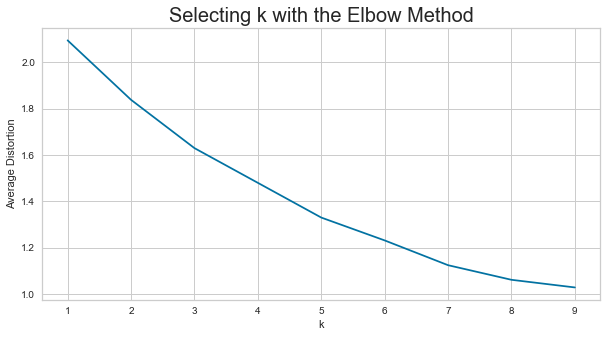

In [67]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k) #we'll get different value of k
    model.fit(data_scaled)
    prediction = model.predict(data_scaled) #give you the label
    distortion = (
        sum(                              #calculating distances of each cluster and summing
            np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1) #it's calculating distance
                #min distance                             #out of any of this points from the cluster centroid, fig 11
        )             #here I will the centroids and distances and the best is the short distance
        / data_scaled.shape[0] #dividing by number of points
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

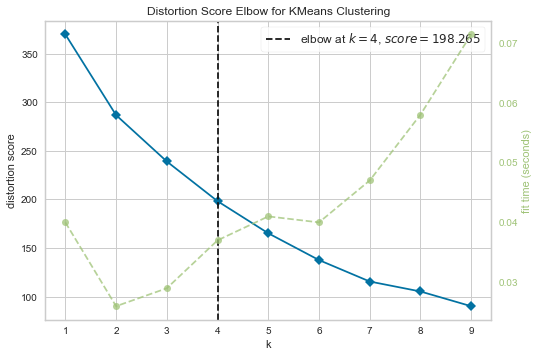

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
#k_means_df = subset_scaled_df.copy()
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,10), timings=True) #timings, time to fit
visualizer.fit(data_scaled)
visualizer.show()

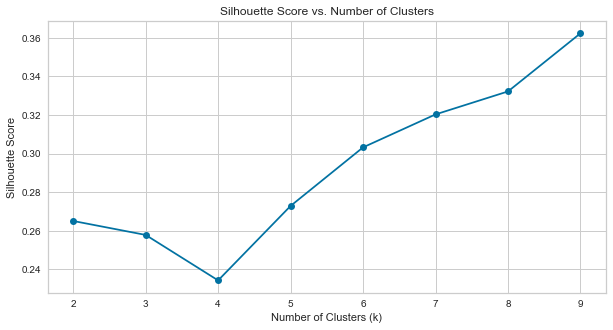

In [69]:
min_clusters=2 
max_clusters=9
silhouette_scores = []

for k in range(min_clusters, max_clusters + 1):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)

    # Get silhouette score
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

cluster-k:  2


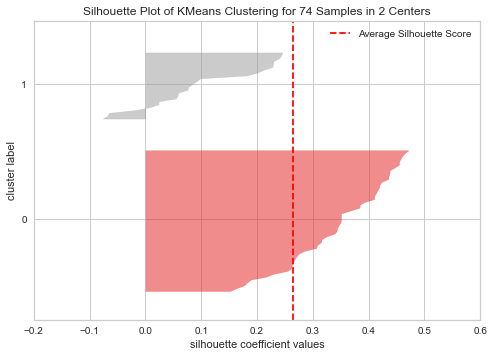

cluster-k:  3


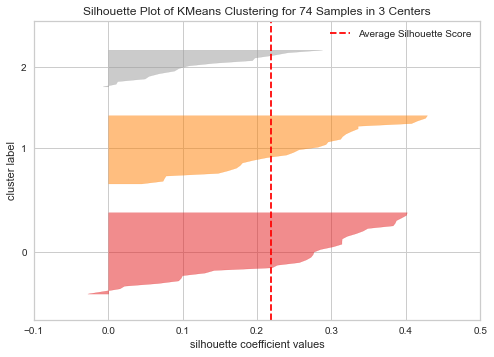

cluster-k:  4


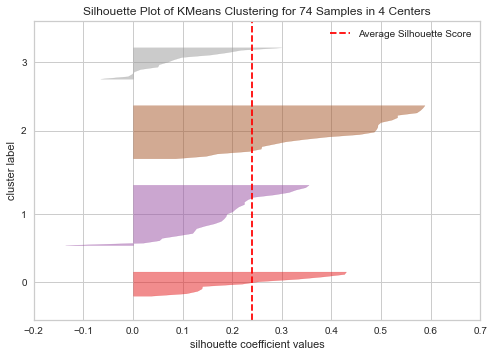

cluster-k:  5


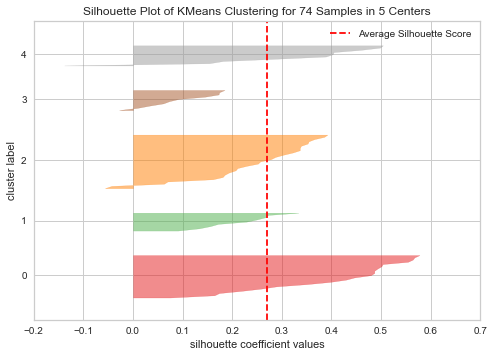

cluster-k:  6


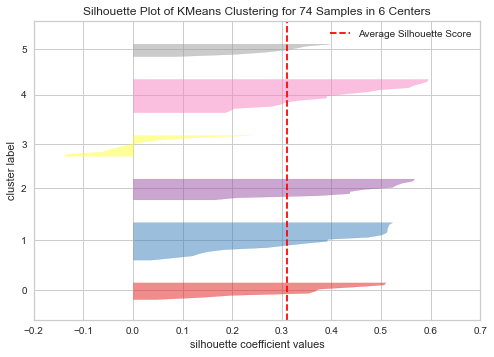

cluster-k:  7


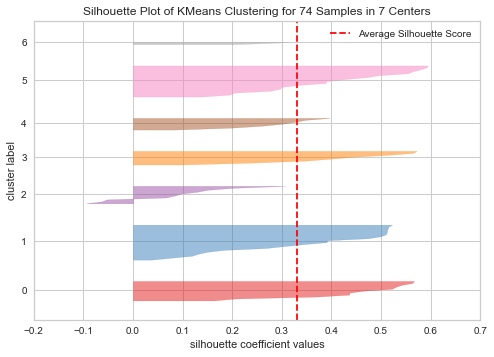

cluster-k:  8


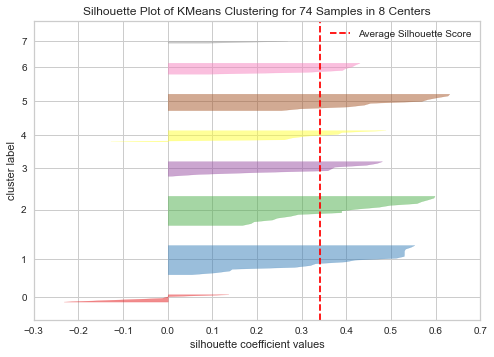

cluster-k:  9


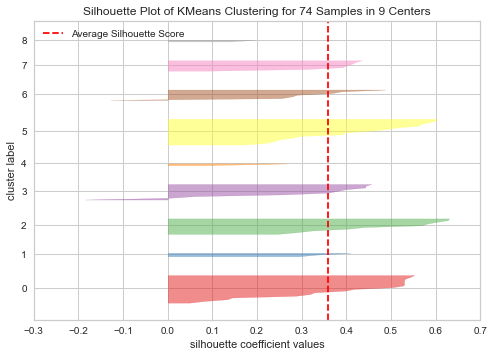

In [70]:
clusters = range(2, 10)
meanDistortions = []

for k in clusters:
    # finding optimal no. of clusters with silhouette coefficients
    print('cluster-k: ',k)
    visualizer = SilhouetteVisualizer(KMeans(k, random_state=1)) #with k clusters
    visualizer.fit(data_scaled);
    visualizer.show();

### Features to select in k-means: k=4 CLUSTERS

In [71]:
data_scaled.shape

(74, 5)

In [72]:
X = np.array(data_scaled)[:,1::]
Y = np.array(data_scaled)[:,0]

In [73]:
# Apply k-means clustering
k = 4  # Number of clusters
kmeans2 = KMeans(n_clusters=k)

In [74]:
kmeans2.fit(data_scaled)

KMeans(n_clusters=4)

In [75]:
# Get the cluster labels for each data point
cluster_labels = kmeans2.labels_
len(cluster_labels) #it has 241 predictions in 5 clusters: 0,1,2,3,4

74

In [76]:
kmeans2.inertia_

198.32202682365084

## Metrics of the clusters

**Data Frame of clusters centers**

In [77]:
kmeans2.cluster_centers_[0:1] #first cluster center / shape:(1,21)

array([[-0.65840027, -0.19993753, -0.39191954, -0.49852679,  0.92248743]])

In [78]:
cluster_center_df = pd.DataFrame(kmeans2.cluster_centers_, columns=data_encoded.columns.tolist())
cluster_center_df.head()

,estudios,ocupación,ingresos,sector,edad
0,-0.658400,-0.199938,-0.391920,-0.498527,0.922487
1,0.309356,1.045774,1.089202,-0.279464,-0.022293
2,0.146583,-0.536041,-0.539256,-0.342629,-0.882201
3,0.518888,-0.046776,0.277087,2.176507,0.114281


**Data Frame of the mean of each clusters**

In [79]:
mean_of_clusters = scaler.inverse_transform(cluster_center_df) #inverse transform
inverse_transform_df = pd.DataFrame(mean_of_clusters,columns=data_encoded.columns.tolist())
inverse_transform_df.head()

,estudios,ocupación,ingresos,sector,edad
0,27.922078,8.909091,291.863636,10.681818,44.454545
1,48.739496,20.000000,612.176471,13.529412,32.764706
2,45.238095,5.916667,260.000000,12.708333,22.125000
3,53.246753,10.272727,436.545455,45.454545,34.454545


In [80]:
cluster_labels

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 0, 2, 3,
       0, 0, 3, 3, 3, 2, 2, 2, 0, 1, 2, 0, 1, 3, 0, 3, 1, 3, 2, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1])

In [81]:
data_encoded['cluster'] = cluster_labels

In [82]:
data_encoded.groupby('cluster').mean()

,estudios,ocupación,ingresos,sector,edad
cluster,,,,,
0,27.922078,8.909091,291.863636,10.681818,44.454545
1,48.739496,20.000000,612.176471,13.529412,32.764706
2,45.238095,5.916667,260.000000,12.708333,22.125000
3,53.246753,10.272727,436.545455,45.454545,34.454545


**Data Frame encoded etiquetado con clusters**

In [83]:
data_encoded.head(2)

,estudios,ocupación,ingresos,sector,edad,cluster
177,28.571429,10,260.0,10,52,0
178,71.428571,10,260.0,10,32,2


In [84]:
#data_encoded.drop('cluster',axis=1,inplace=True)

In [85]:
kmeans2.cluster_centers_[0].shape

(5,)

Text(0, 0.5, 'edad')

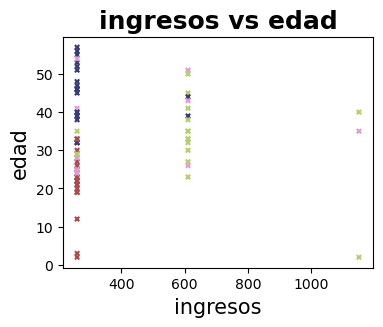

In [87]:
x_name='ingresos'
y_name='edad'


plt.style.use('default')
plt.figure(figsize=(4, 3))
plt.scatter(data_encoded[x_name], 
            data_encoded[y_name], 
            c = kmeans2.labels_.astype(float), s=10, cmap='tab20b', marker='x')
plt.title(x_name+' vs '+y_name, fontsize=18, fontweight='bold')
plt.xlabel(x_name, fontsize=15)
plt.ylabel(y_name, fontsize=15)

#centers = kmeans2.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

**Data Frame Original con clusters**

In [88]:
#Add the cluster labels to the original dataset
df2['cluster'] = cluster_labels

#Print the clusters
df2.head()

,estudios,ocupación,ingresos,sector,edad,cluster
177,28.571429,10,260.0,10,52,0
178,71.428571,10,260.0,10,32,2
179,28.571429,10,260.0,10,53,0
180,28.571429,10,260.0,10,22,2
181,28.571429,10,260.0,10,57,0


In [89]:
df2['cluster'].value_counts()

2    24
0    22
1    17
3    11
Name: cluster, dtype: int64

In [90]:
df2.groupby(by='cluster').mean()

,estudios,ocupación,ingresos,sector,edad
cluster,,,,,
0,27.922078,8.909091,291.863636,10.681818,44.454545
1,48.739496,20.000000,612.176471,13.529412,32.764706
2,45.238095,5.916667,260.000000,12.708333,22.125000
3,53.246753,10.272727,436.545455,45.454545,34.454545


In [91]:
for i in range(0,k):
    print("cluster: ",i)
    print(df2[df2['cluster']==i].describe())
    print(df2.groupby(by='cluster').mean()[i:i+1])
    print("\n")

cluster:  0
        estudios  ocupación    ingresos     sector       edad  cluster
count  22.000000  22.000000   22.000000  22.000000  22.000000     22.0
mean   27.922078   8.909091  291.863636  10.681818  44.454545      0.0
std    11.220272   6.760594  103.132853   3.198011   7.601549      0.0
min    14.285714   1.000000  260.000000  10.000000  32.000000      0.0
25%    28.571429   3.250000  260.000000  10.000000  39.000000      0.0
50%    28.571429  10.000000  260.000000  10.000000  45.500000      0.0
75%    28.571429  10.000000  260.000000  10.000000  50.250000      0.0
max    71.428571  30.000000  610.500000  25.000000  57.000000      0.0
          estudios  ocupación    ingresos     sector       edad
cluster                                                        
0        27.922078   8.909091  291.863636  10.681818  44.454545


cluster:  1
        estudios  ocupación     ingresos     sector       edad  cluster
count  17.000000  17.000000    17.000000  17.000000  17.000000     17.0

## Testing the kmeans model

In [92]:
data_test=data_encoded.drop('cluster',axis=1)

In [93]:
kmeans2.predict(data_test.iloc[0:1])

array([1])

In [94]:
kmeans2.predict(data_test.iloc[0:73])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [95]:
kmeans2.predict(data_test.iloc[70:71])

array([1])

In [96]:
len(kmeans2.labels_)

74

In [97]:
data_encoded.reset_index(inplace=True)
data_encoded.head(2)

,index,estudios,ocupación,ingresos,sector,edad,cluster
0,177,28.571429,10,260.0,10,52,0
1,178,71.428571,10,260.0,10,32,2


In [98]:
data_encoded.drop('index',axis=1,inplace=True)

In [99]:
data_encoded.sample(5)

,estudios,ocupación,ingresos,sector,edad,cluster
18,28.571429,1,260.0,10,21,2
4,28.571429,10,260.0,10,57,0
70,85.714286,10,610.5,50,26,3
15,28.571429,1,260.0,10,39,0
69,71.428571,20,610.5,25,35,1


In [100]:
data_encoded.iloc[19:20]

,estudios,ocupación,ingresos,sector,edad,cluster
19,28.571429,1,260.0,10,23,2


#### Input of data in kmeans model

In [101]:
dict1={'estudios':[28], 'ocupación':[1], 'ingresos':[260], 'sector':[10],'edad':[23]}
data=pd.DataFrame(data=dict1)
kmeans2.predict(data)

array([1])

In [102]:
import pickle

In [103]:
# save the model to disk
filename = 'kmeans_model.sav'
pickle.dump(kmeans2, open(filename, 'wb'))

## Conclusions

Text(0, 0.5, 'edad')

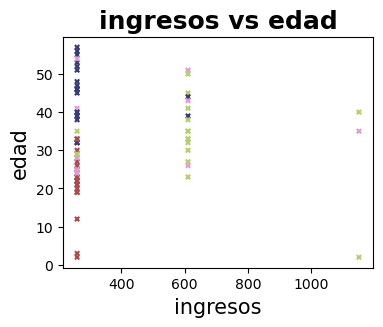

In [104]:
x_name='ingresos'
y_name='edad'

plt.style.use('default')
plt.figure(figsize=(4, 3))
plt.scatter(data_encoded[x_name], 
            data_encoded[y_name], 
            c = kmeans2.labels_.astype(float), s=10, cmap='tab20b', marker='x')
plt.title(x_name+' vs '+y_name, fontsize=18, fontweight='bold')
plt.xlabel(x_name, fontsize=15)
plt.ylabel(y_name, fontsize=15)

- This graph shows us that there two groups of people who have incomes around USD200 and USD600, and the most population has more points between 20 and 40 years old.

Text(0, 0.5, 'sector')

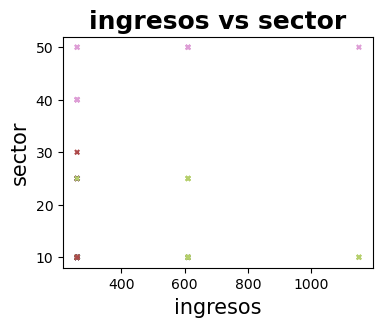

In [106]:
x_name='ingresos'
y_name='sector'

plt.style.use('default')
plt.figure(figsize=(4, 3))
plt.scatter(data_encoded[x_name], 
            data_encoded[y_name], 
            c = kmeans2.labels_.astype(float), s=10, cmap='tab20b', marker='x')
plt.title(x_name+' vs '+y_name, fontsize=18, fontweight='bold')
plt.xlabel(x_name, fontsize=15)
plt.ylabel(y_name, fontsize=15)

- According to the incomes, the people who have less than USD400 monthly incomes buy the products no matter if they live kilometers near or far from the institution. And there are a little people who perceives more than USD1000 monthly incomes that often buy the products, either they live 10 or 50 kms from the institution. 